In [10]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
file_path = 'healthcare-dataset-stroke-data (1).csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head(), data.info(), data.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


(      id  gender   age  hypertension  heart_disease ever_married  \
 0   9046    Male  67.0             0              1          Yes   
 1  51676  Female  61.0             0              0          Yes   
 2  31112    Male  80.0             0              1          Yes   
 3  60182  Female  49.0             0              0          Yes   
 4   1665  Female  79.0             1              0          Yes   
 
        work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
 0        Private          Urban             228.69  36.6  formerly smoked   
 1  Self-employed          Rural             202.21   NaN     never smoked   
 2        Private          Rural             105.92  32.5     never smoked   
 3        Private          Urban             171.23  34.4           smokes   
 4  Self-employed          Rural             174.12  24.0     never smoked   
 
    stroke  
 0       1  
 1       1  
 2       1  
 3       1  
 4       1  ,
 None,
                   id  gende

DATA PREPARATION and DATA HANDLING

In [11]:
# Descriptive Statistics
print("\nDescriptive Statistics:")
print(data.describe(include='all'))


Descriptive Statistics:
                  id  gender          age  hypertension  heart_disease  \
count    5110.000000    5110  5110.000000   5110.000000    5110.000000   
unique           NaN       3          NaN           NaN            NaN   
top              NaN  Female          NaN           NaN            NaN   
freq             NaN    2994          NaN           NaN            NaN   
mean    36517.829354     NaN    43.226614      0.097456       0.054012   
std     21161.721625     NaN    22.612647      0.296607       0.226063   
min        67.000000     NaN     0.080000      0.000000       0.000000   
25%     17741.250000     NaN    25.000000      0.000000       0.000000   
50%     36932.000000     NaN    45.000000      0.000000       0.000000   
75%     54682.000000     NaN    61.000000      0.000000       0.000000   
max     72940.000000     NaN    82.000000      1.000000       1.000000   

       ever_married work_type Residence_type  avg_glucose_level          bmi  \
count 

In [12]:
# Checking Missing Values
print("\nMissing Values:")
print(data.isnull().sum())



Missing Values:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [13]:
# Checking Duplicates
print("\nDuplicate Rows:", data.duplicated().sum())


Duplicate Rows: 0


EDA

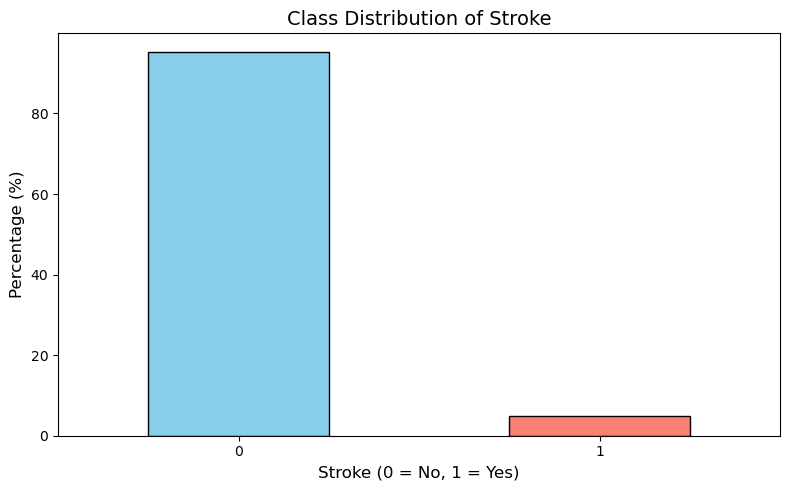

stroke
0    95.127202
1     4.872798
Name: proportion, dtype: float64

In [14]:
# Calculating the class distribution for the 'stroke' column
stroke_distribution = data['stroke'].value_counts(normalize=True) * 100

# Plotting the class distribution
plt.figure(figsize=(8, 5))
stroke_distribution.plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black')
plt.title("Class Distribution of Stroke", fontsize=14)
plt.xlabel("Stroke (0 = No, 1 = Yes)", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

stroke_distribution


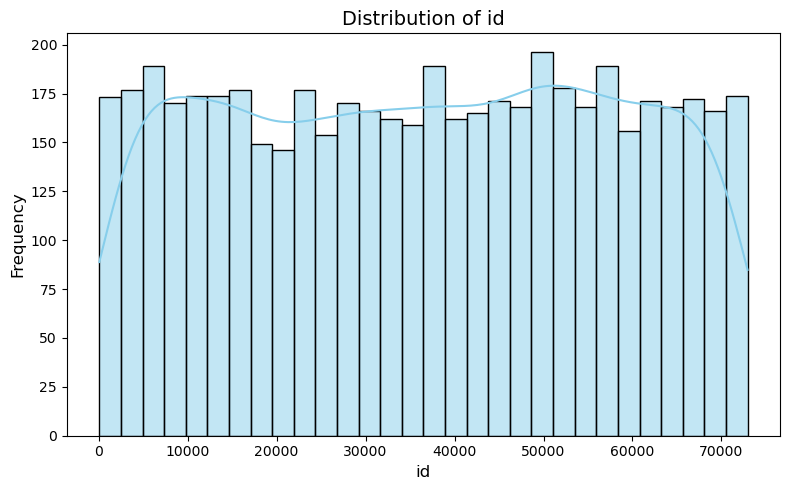

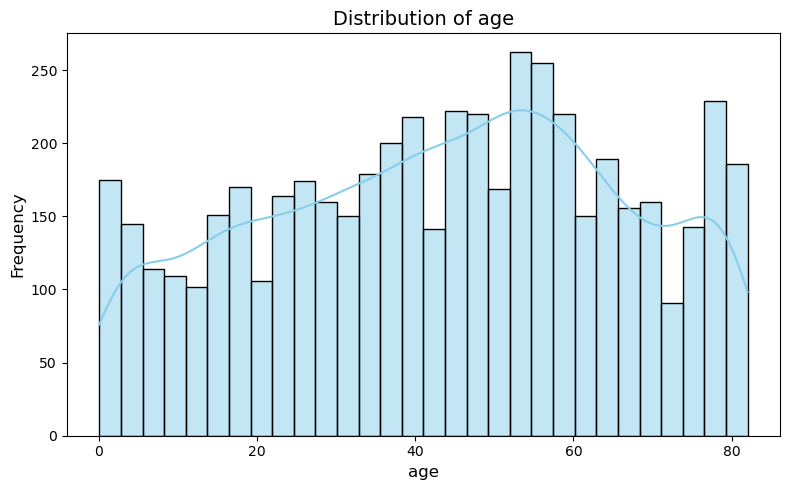

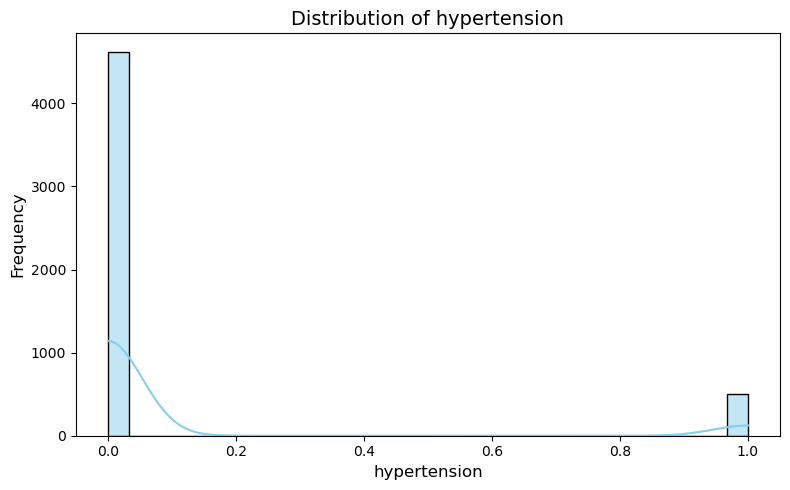

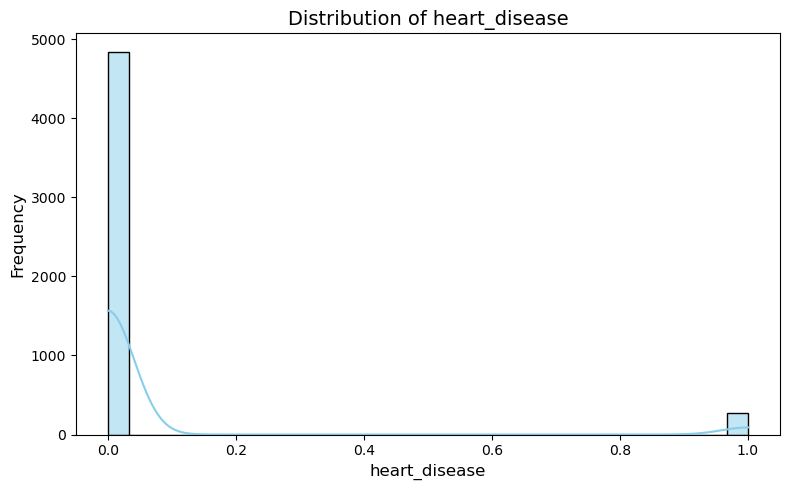

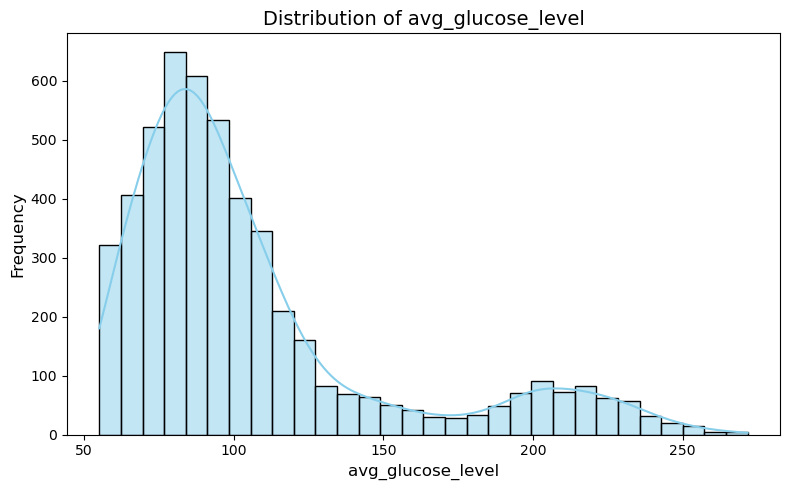

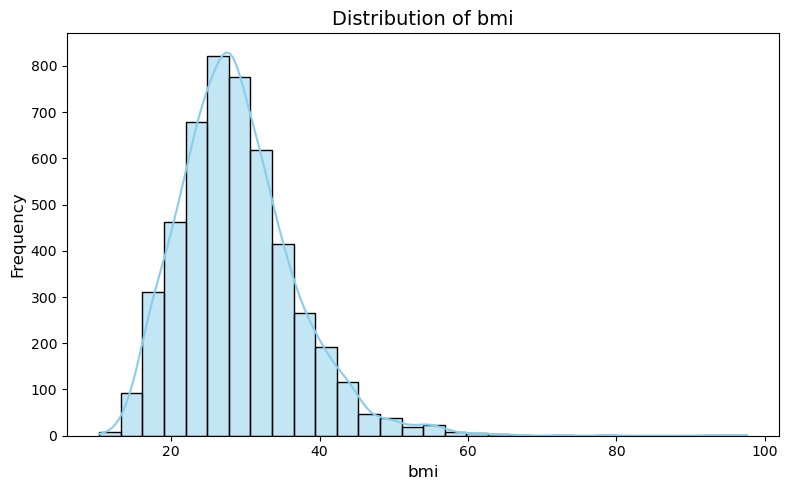

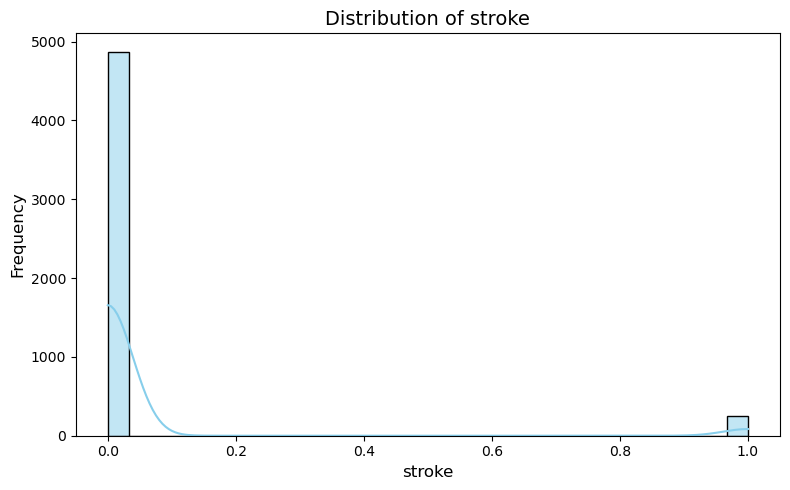

In [15]:
# Correctly define numerical features
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns

# Plotting histograms for numerical features
for column in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[column], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.tight_layout()
    plt.show()


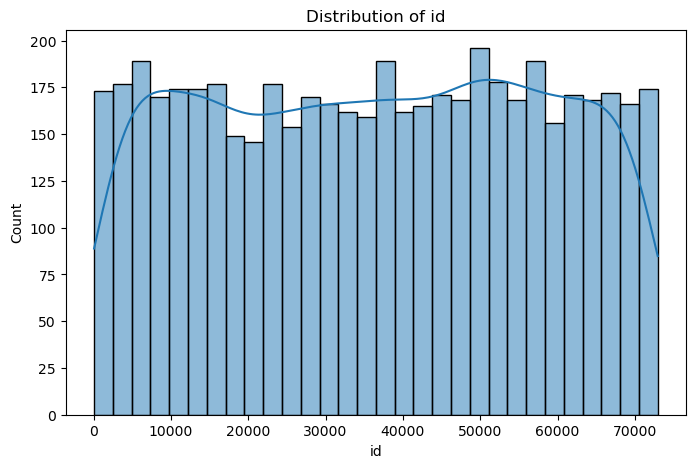

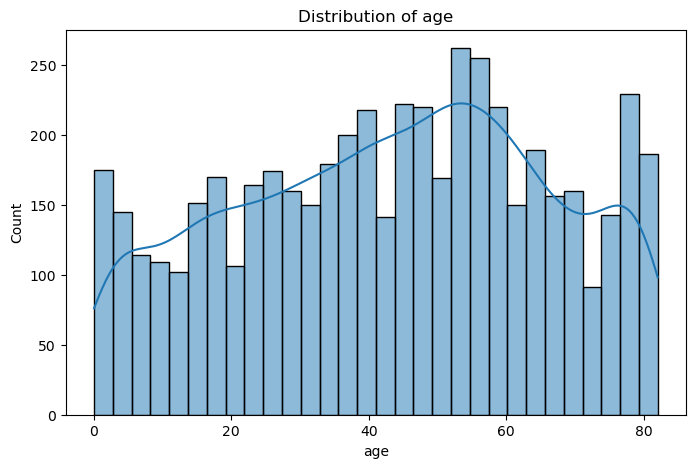

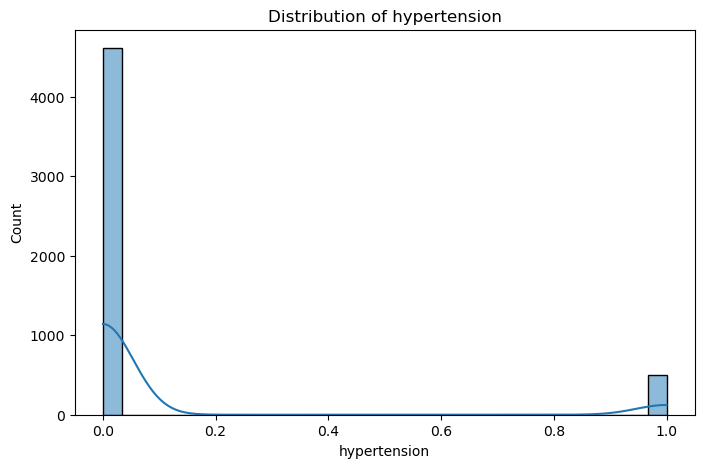

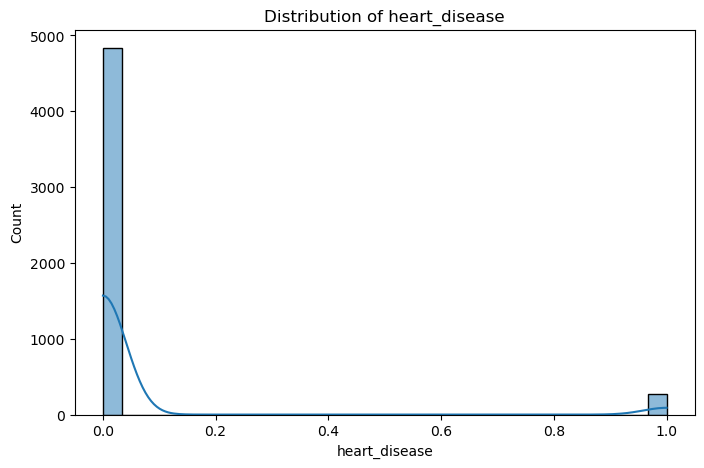

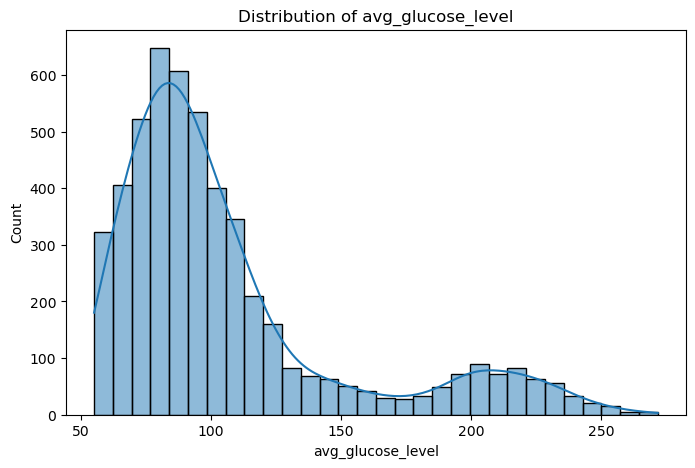

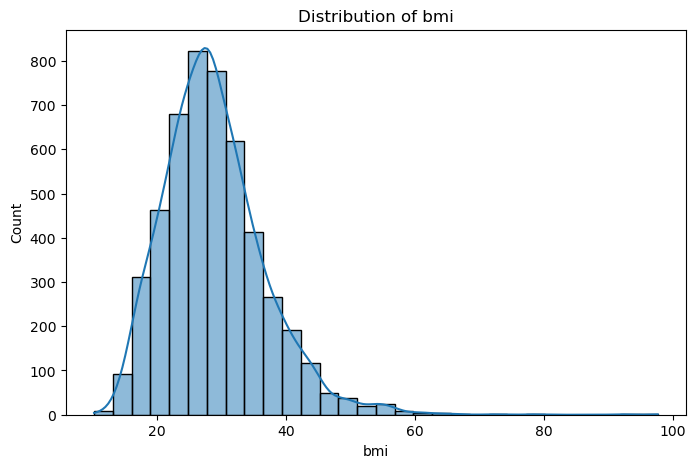

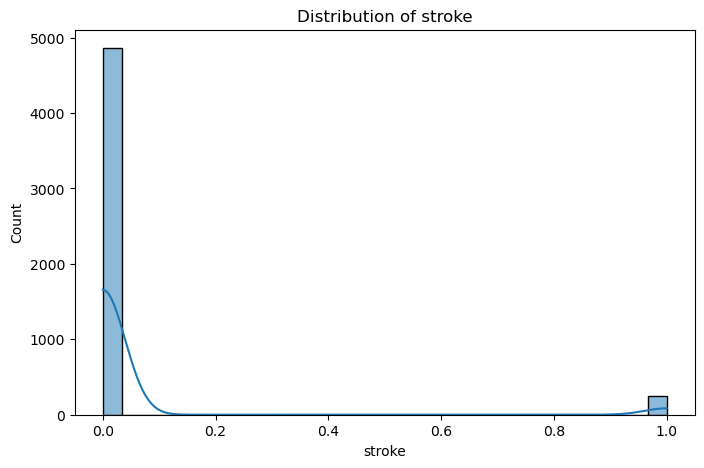

In [16]:
#  Distribution of Numerical Features
for column in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.show()

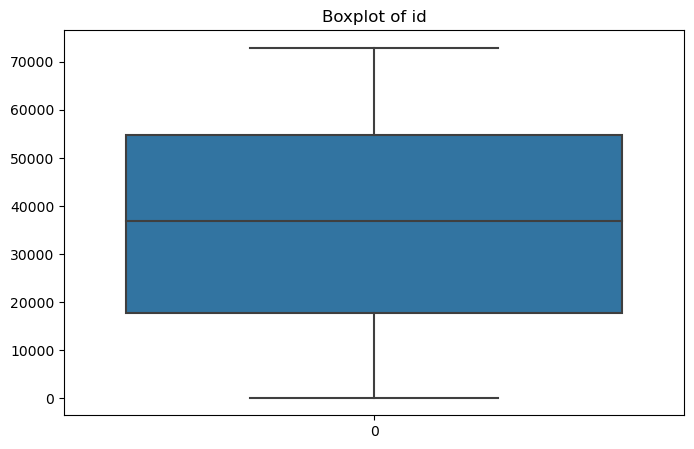

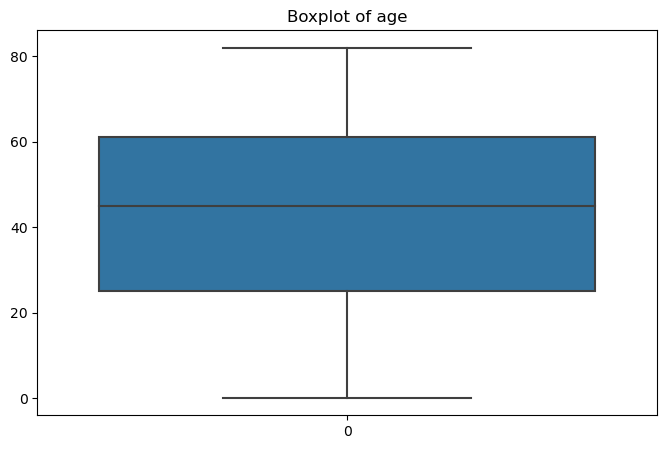

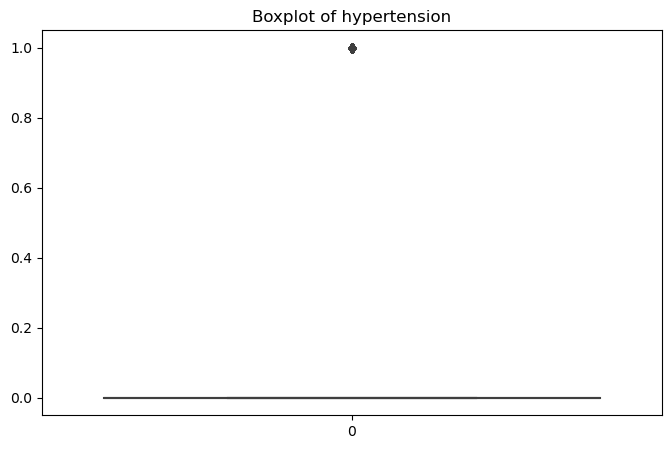

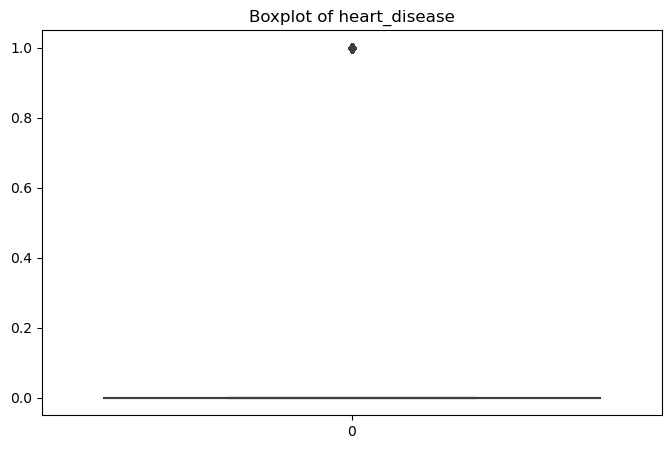

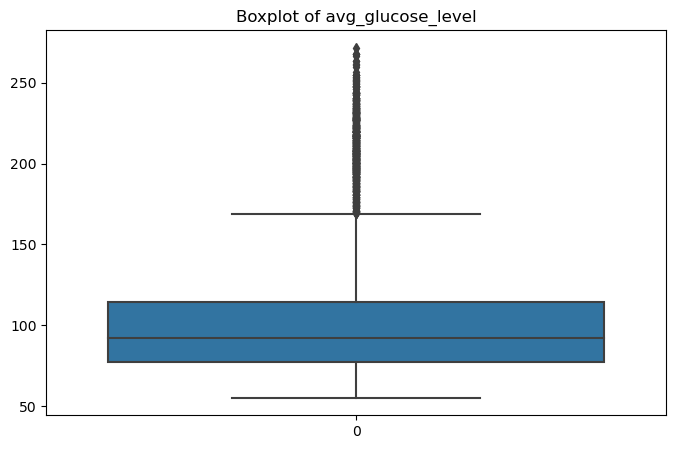

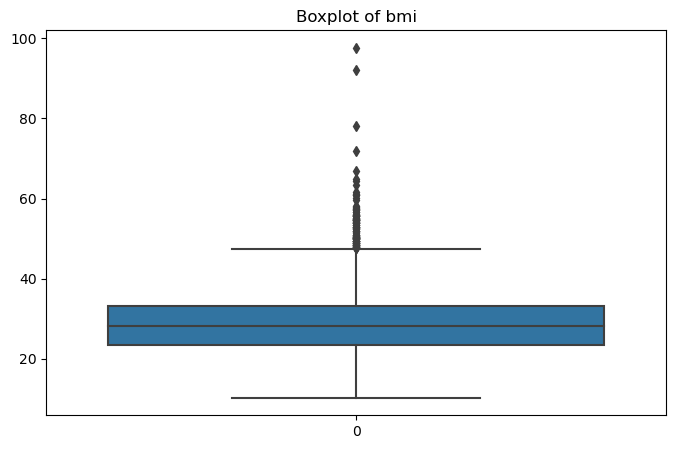

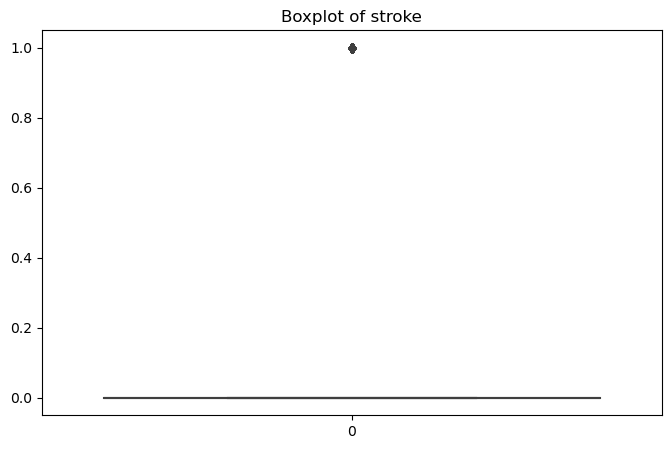

In [17]:
# Boxplots for Outliers
for column in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

/tmp/ipykernel_950/1920643839.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_950/1920643839.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_950/1920643839.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_950/1920643839.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_950/1920643839.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_950/1920643839.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


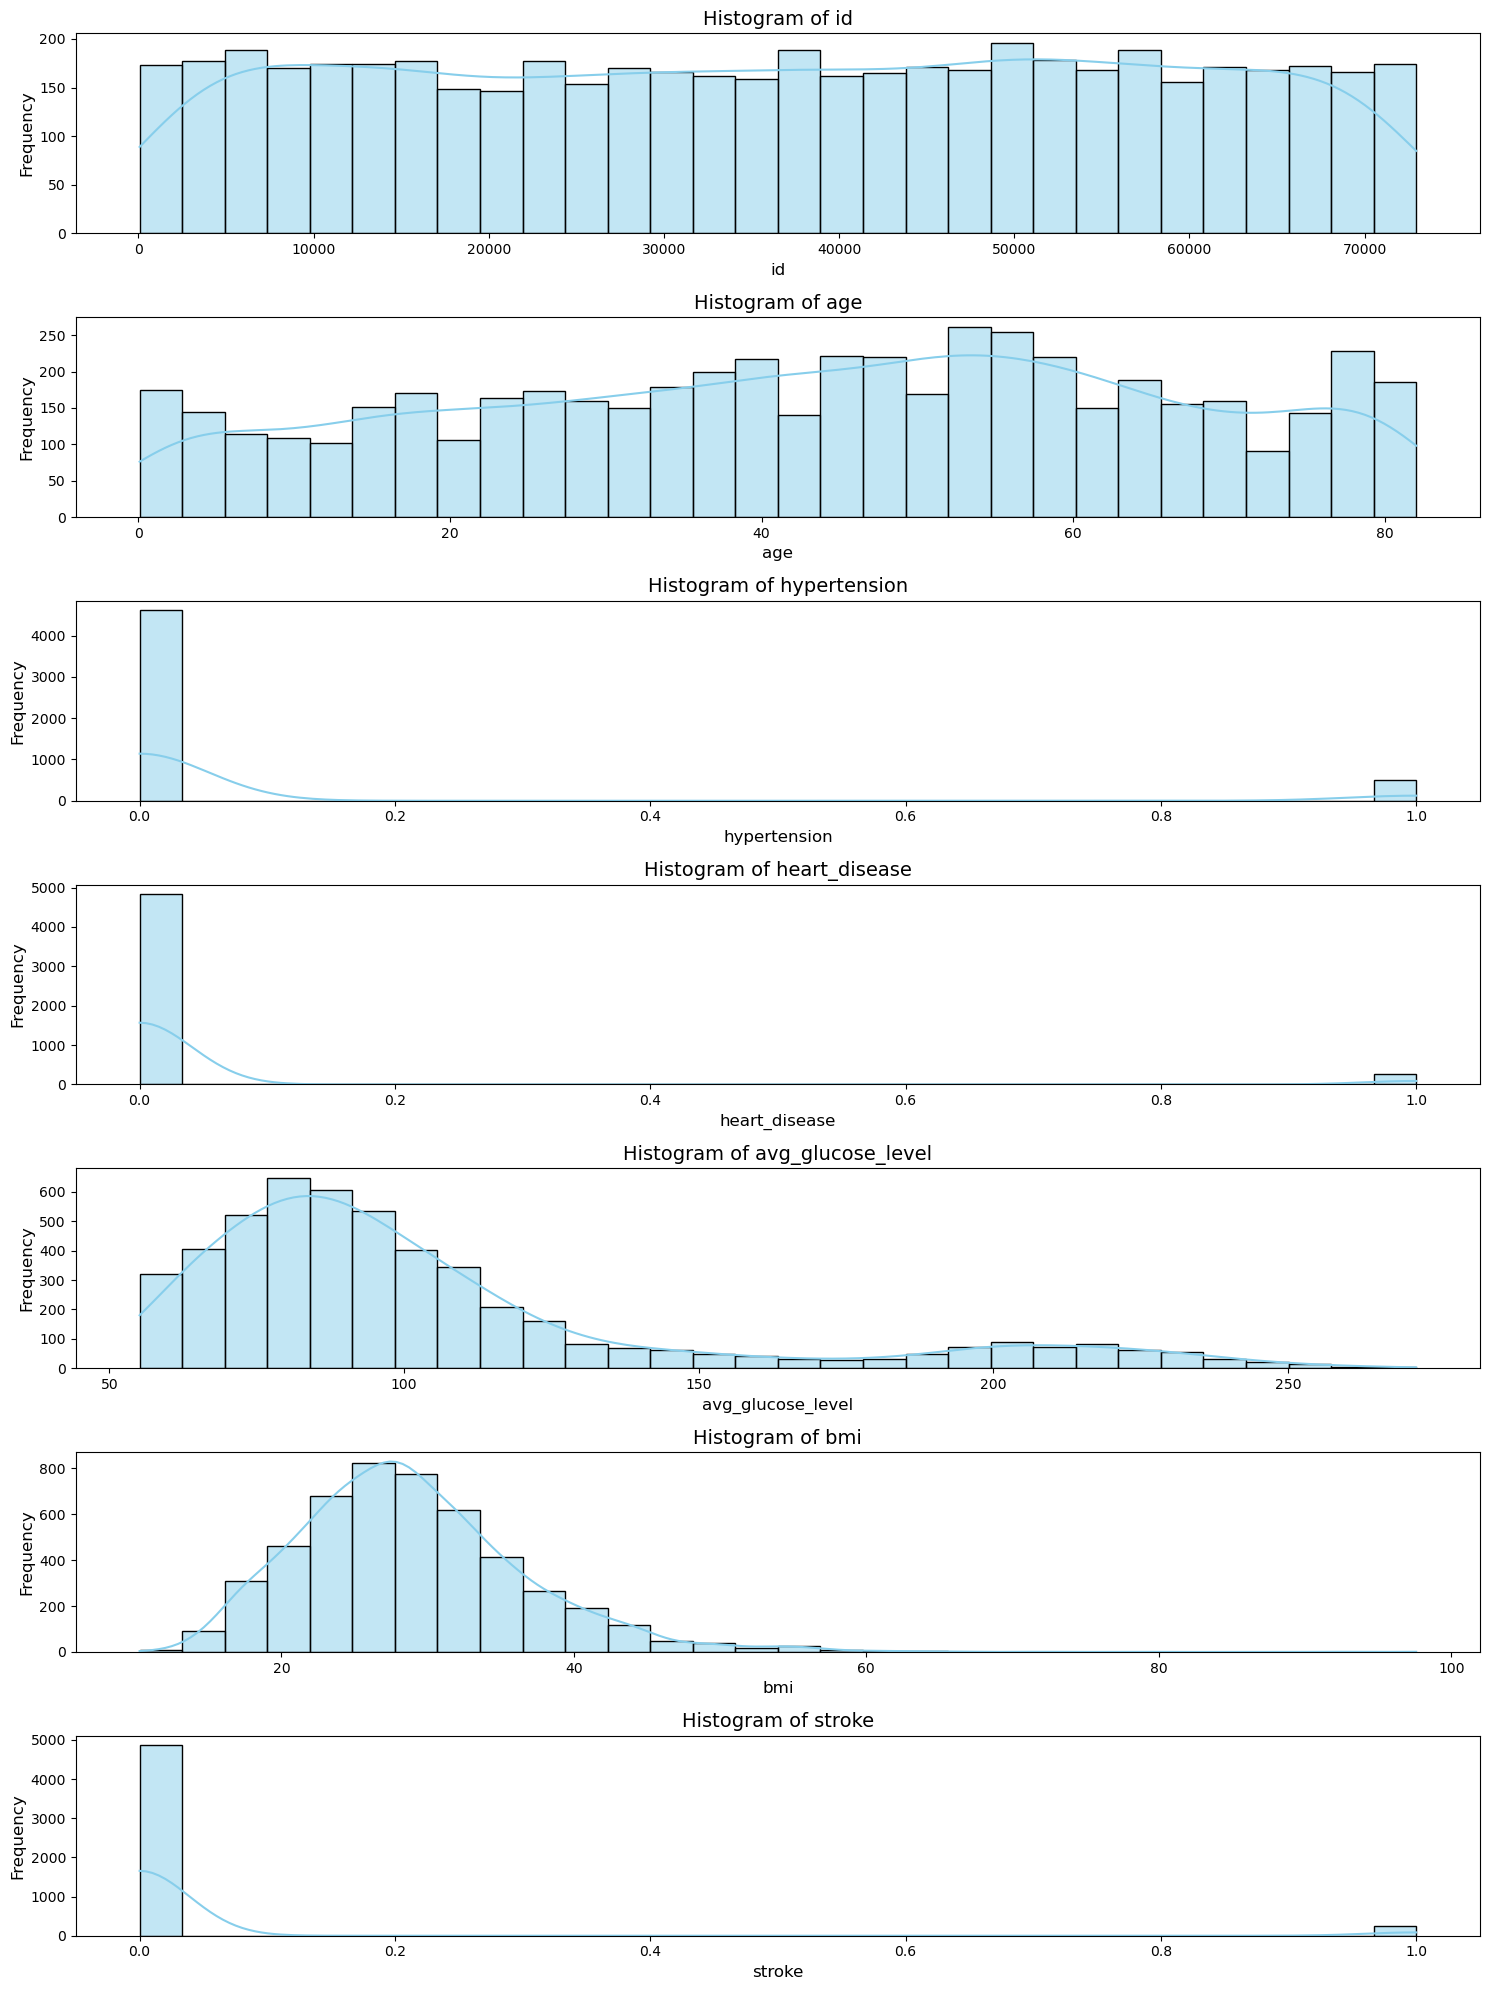

In [18]:
# Creating histograms for all numerical features
plt.figure(figsize=(15, 20))
for i, column in enumerate(numerical_features, 1):
    plt.subplot(len(numerical_features), 1, i)
    sns.histplot(data[column], kde=True, bins=30, color='skyblue')
    plt.title(f'Histogram of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.tight_layout()

plt.show()


/tmp/ipykernel_950/1315578892.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_950/1315578892.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_950/1315578892.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_950/1315578892.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


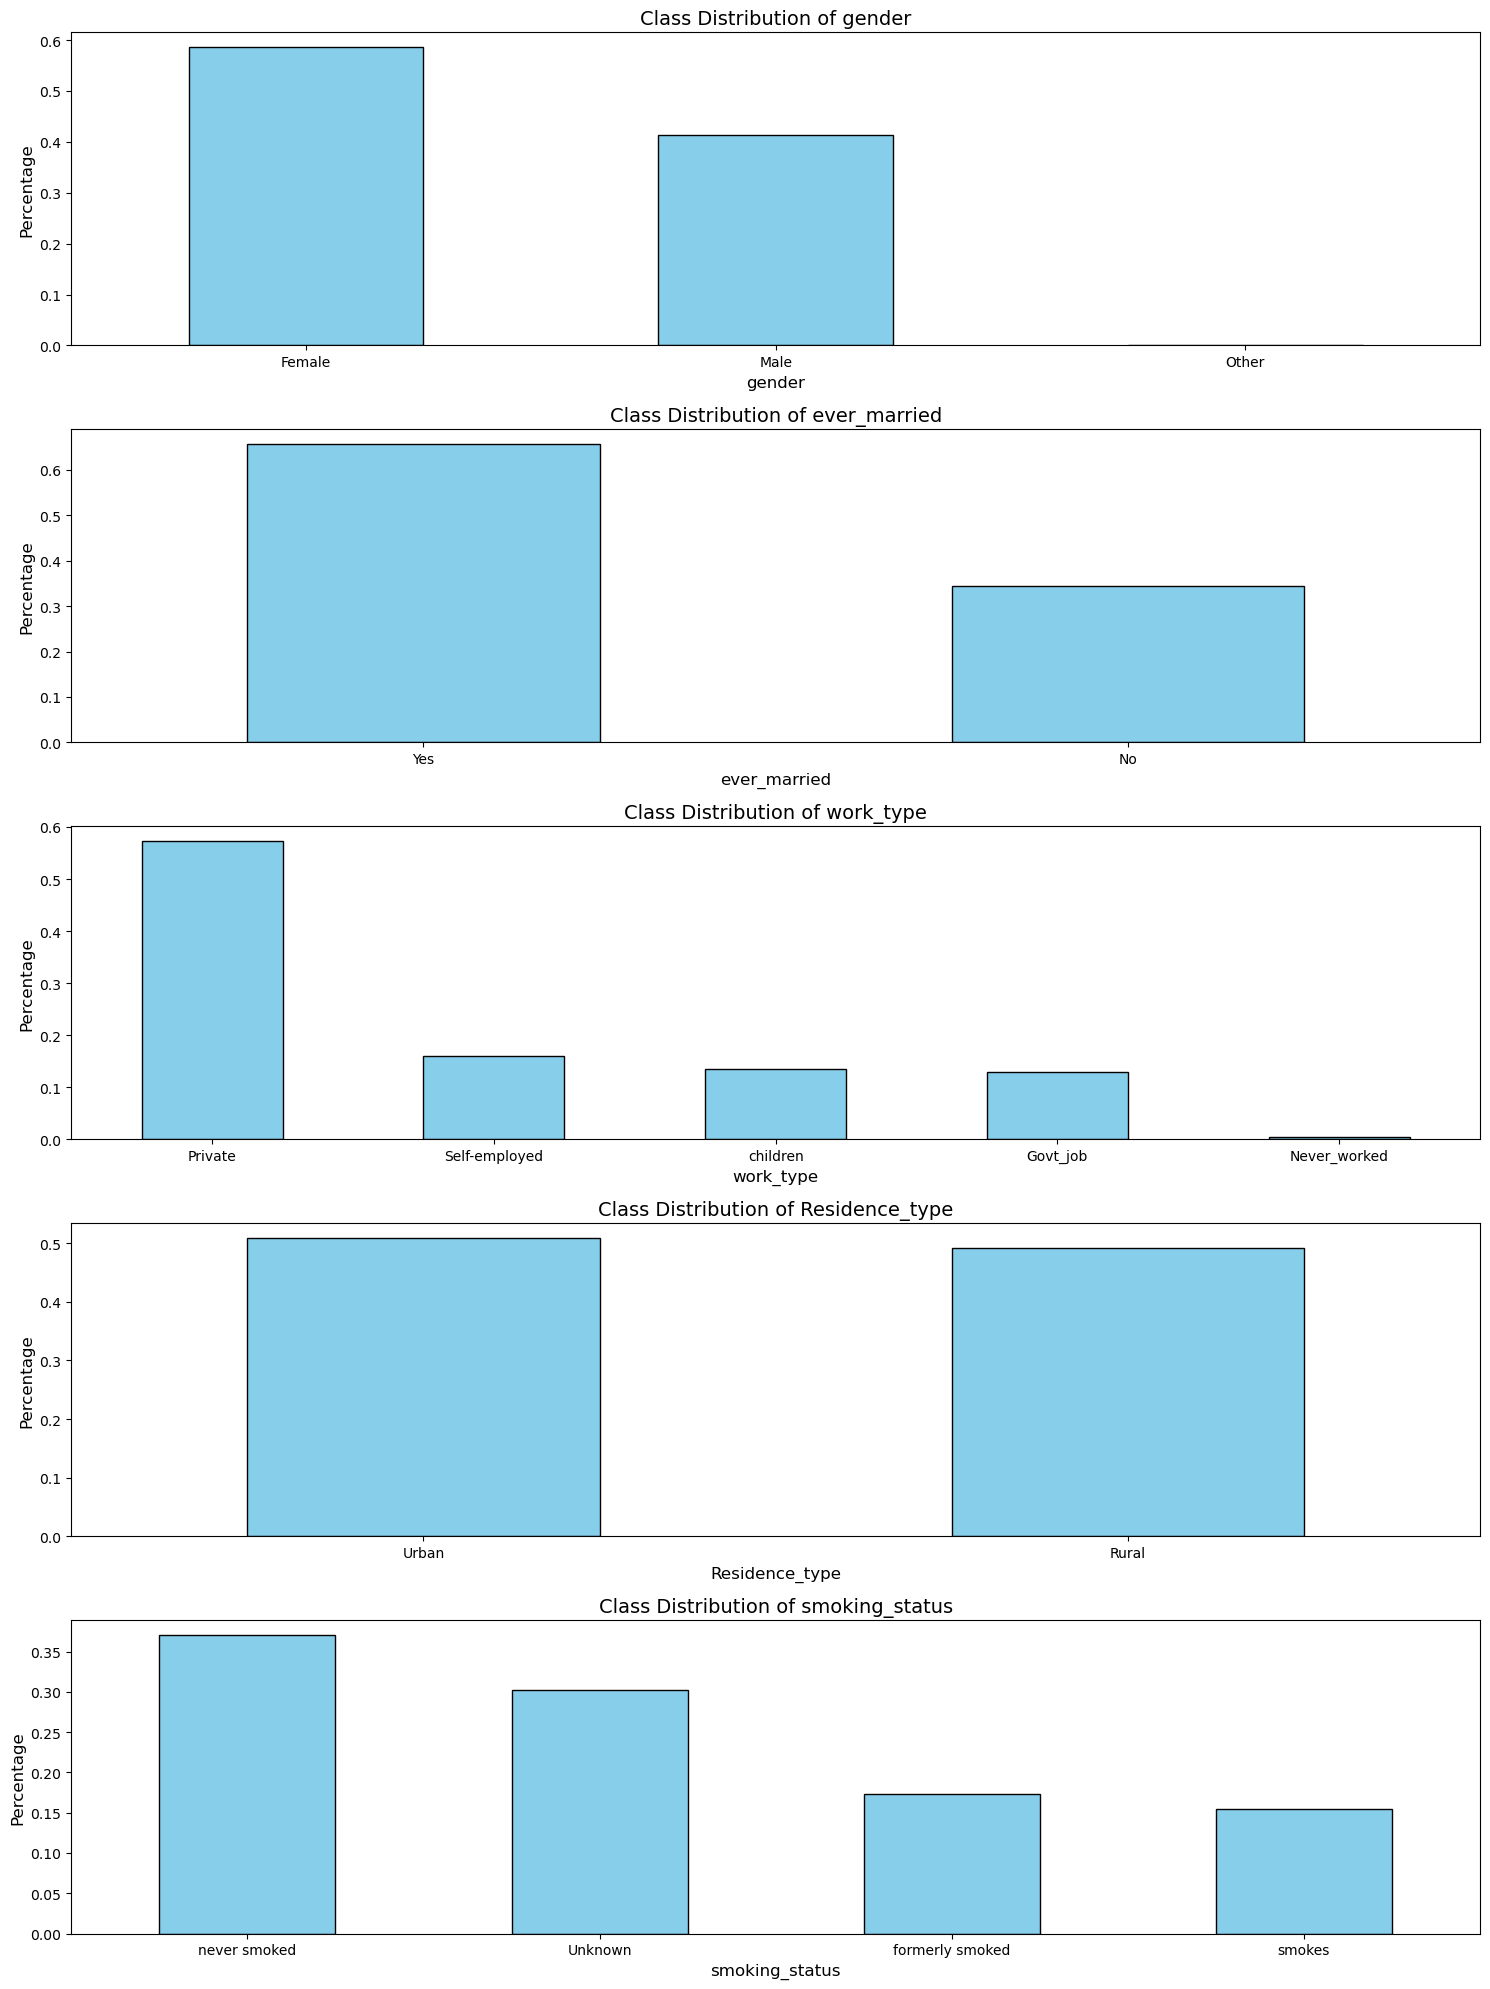

In [19]:
# Selecting categorical features for class distribution visualization
categorical_features = data.select_dtypes(include=['object']).columns

# Creating subplots for the class distribution of each categorical feature
plt.figure(figsize=(15, 20))
for i, column in enumerate(categorical_features, 1):
    plt.subplot(len(categorical_features), 1, i)
    data[column].value_counts(normalize=True).plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Class Distribution of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Percentage', fontsize=12)
    plt.xticks(rotation=0)
    plt.tight_layout()

plt.show()


In [20]:
from sklearn.impute import SimpleImputer

# Handling Missing Values for BMI using Median Imputation
bmi_imputer = SimpleImputer(strategy='median')
data['bmi'] = bmi_imputer.fit_transform(data[['bmi']])

# Handling Outliers in Avg Glucose Level and BMI
# Using IQR method to remove extreme outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers in avg_glucose_level and bmi
data_cleaned = remove_outliers(data, 'avg_glucose_level')
data_cleaned = remove_outliers(data_cleaned, 'bmi')

# Standardize Categorical Data
data_cleaned['gender'] = data_cleaned['gender'].replace({'Other': 'Unknown'})  # Replace 'Other' with 'Unknown'
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in categorical_cols:
    data_cleaned[col] = data_cleaned[col].astype('category')

# Confirm the dataset is cleaned
data_cleaned.info()

# Display a summary of the cleaned dataset
data_cleaned.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
Index: 4383 entries, 2 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 4383 non-null   int64   
 1   gender             4383 non-null   category
 2   age                4383 non-null   float64 
 3   hypertension       4383 non-null   int64   
 4   heart_disease      4383 non-null   int64   
 5   ever_married       4383 non-null   category
 6   work_type          4383 non-null   category
 7   Residence_type     4383 non-null   category
 8   avg_glucose_level  4383 non-null   float64 
 9   bmi                4383 non-null   float64 
 10  smoking_status     4383 non-null   category
 11  stroke             4383 non-null   int64   
dtypes: category(5), float64(3), int64(4)
memory usage: 296.1 KB


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4383.000000,4383,4383.000000,4383.000000,4383.000000,4383,4383,4383,4383.000000,4383.000000,4383,4383.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2585,NaN,NaN,NaN,2730,2476,2225,NaN,NaN,1592,NaN
mean,36605.005248,NaN,40.893762,0.074378,0.039243,NaN,NaN,NaN,91.476126,27.744673,NaN,0.037417
std,21166.169103,NaN,22.565008,0.262415,0.194194,NaN,NaN,NaN,22.663253,6.518535,NaN,0.189804
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17864.500000,NaN,23.000000,0.000000,0.000000,NaN,NaN,NaN,75.075000,23.200000,NaN,0.000000
50%,36969.000000,NaN,42.000000,0.000000,0.000000,NaN,NaN,NaN,88.040000,27.600000,NaN,0.000000
75%,54870.000000,NaN,58.000000,0.000000,0.000000,NaN,NaN,NaN,104.025000,31.800000,NaN,0.000000


In [21]:
# Function to count outliers based on the IQR method
def count_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()

# Count outliers in avg_glucose_level and bmi
outliers_glucose = count_outliers(data, 'avg_glucose_level')
outliers_bmi = count_outliers(data, 'bmi')

outliers_glucose, outliers_bmi


(627, 126)

In [22]:
# Removing outliers from avg_glucose_level and bmi columns
data_no_outliers = remove_outliers(data, 'avg_glucose_level')
data_no_outliers = remove_outliers(data_no_outliers, 'bmi')

# Display the resulting dataset info and summary statistics after outlier removal
data_no_outliers.info(), data_no_outliers.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
Index: 4383 entries, 2 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4383 non-null   int64  
 1   gender             4383 non-null   object 
 2   age                4383 non-null   float64
 3   hypertension       4383 non-null   int64  
 4   heart_disease      4383 non-null   int64  
 5   ever_married       4383 non-null   object 
 6   work_type          4383 non-null   object 
 7   Residence_type     4383 non-null   object 
 8   avg_glucose_level  4383 non-null   float64
 9   bmi                4383 non-null   float64
 10  smoking_status     4383 non-null   object 
 11  stroke             4383 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 445.1+ KB


(None,
                   id  gender          age  hypertension  heart_disease  \
 count    4383.000000    4383  4383.000000   4383.000000    4383.000000   
 unique           NaN       3          NaN           NaN            NaN   
 top              NaN  Female          NaN           NaN            NaN   
 freq             NaN    2585          NaN           NaN            NaN   
 mean    36605.005248     NaN    40.893762      0.074378       0.039243   
 std     21166.169103     NaN    22.565008      0.262415       0.194194   
 min        67.000000     NaN     0.080000      0.000000       0.000000   
 25%     17864.500000     NaN    23.000000      0.000000       0.000000   
 50%     36969.000000     NaN    42.000000      0.000000       0.000000   
 75%     54870.000000     NaN    58.000000      0.000000       0.000000   
 max     72940.000000     NaN    82.000000      1.000000       1.000000   
 
        ever_married work_type Residence_type  avg_glucose_level          bmi  \
 count    

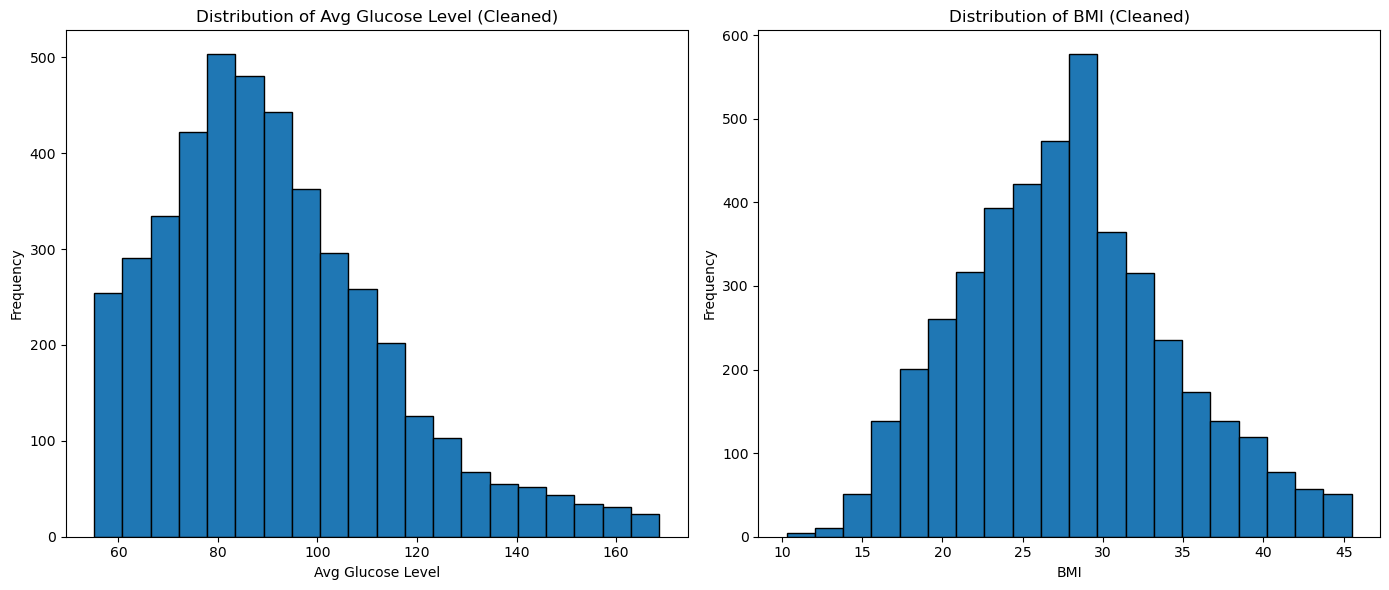

In [23]:
# Set up the figure for visualization
plt.figure(figsize=(14, 6))

# Subplot 1: Distribution of Avg Glucose Level
plt.subplot(1, 2, 1)
plt.hist(data_no_outliers['avg_glucose_level'], bins=20, edgecolor='black')
plt.title('Distribution of Avg Glucose Level (Cleaned)')
plt.xlabel('Avg Glucose Level')
plt.ylabel('Frequency')

# Subplot 2: Distribution of BMI
plt.subplot(1, 2, 2)
plt.hist(data_no_outliers['bmi'], bins=20, edgecolor='black')
plt.title('Distribution of BMI (Cleaned)')
plt.xlabel('BMI')
plt.ylabel('Frequency')

# Display the plots
plt.tight_layout()
plt.show()


In [24]:
# Calculate correlations for numerical columns
correlation_matrix = data_no_outliers[['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease', 'stroke']].corr()

# Display the correlation matrix
correlation_matrix


,age,avg_glucose_level,bmi,hypertension,heart_disease,stroke
age,1.000000,-0.024772,0.379938,0.252186,0.239679,0.227557
avg_glucose_level,-0.024772,1.000000,0.000743,0.002224,-0.000684,0.000119
bmi,0.379938,0.000743,1.000000,0.150505,0.055763,0.028953
hypertension,0.252186,0.002224,0.150505,1.000000,0.090491,0.113637
heart_disease,0.239679,-0.000684,0.055763,0.090491,1.000000,0.090173
stroke,0.227557,0.000119,0.028953,0.113637,0.090173,1.000000


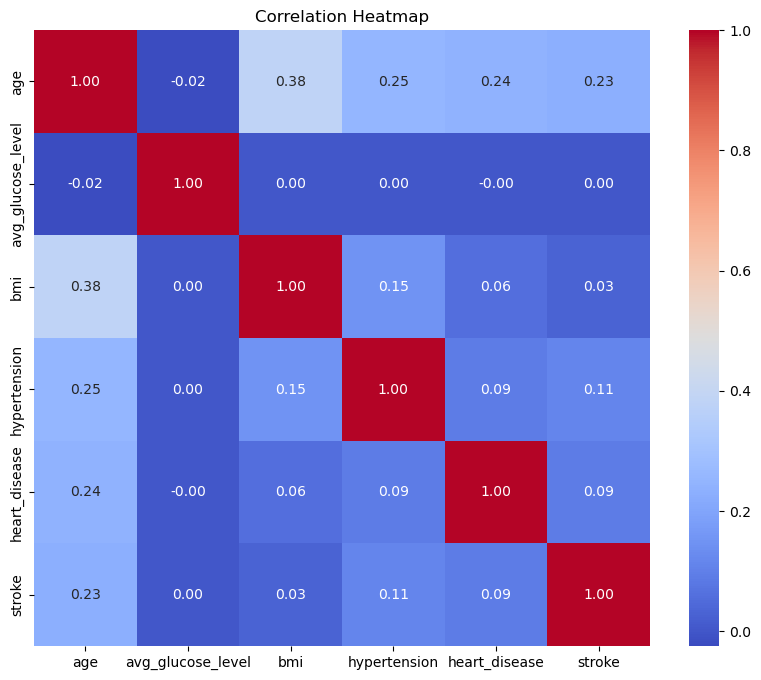

In [25]:
import seaborn as sns

# Set up the figure for the heatmap
plt.figure(figsize=(10, 8))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

# Title and display
plt.title('Correlation Heatmap')
plt.show()


BUILDING MODELS

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Prepare data for modeling
# Select features and target variable
features = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
X = data_no_outliers[features]
y = data_no_outliers['stroke']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42, class_weight="balanced")
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

accuracy, report


(0.9612167300380228,
 '              precision    recall  f1-score   support\n\n           0       0.96      1.00      0.98      1266\n           1       0.25      0.02      0.04        49\n\n    accuracy                           0.96      1315\n   macro avg       0.61      0.51      0.51      1315\nweighted avg       0.94      0.96      0.95      1315\n')

In [27]:
# Alternative: Undersampling the majority class for balanced data
from sklearn.utils import resample

# Combine X_train and y_train for undersampling
train_data = pd.concat([X_train, y_train], axis=1)

# Separate majority and minority classes
non_stroke = train_data[train_data['stroke'] == 0]
stroke = train_data[train_data['stroke'] == 1]

# Downsample the majority class
non_stroke_downsampled = resample(non_stroke, 
                                  replace=False,  # Sample without replacement
                                  n_samples=len(stroke),  # Match minority class
                                  random_state=42)

# Combine the downsampled majority class with the minority class
balanced_data = pd.concat([non_stroke_downsampled, stroke])

# Split the balanced data back into X and y
X_balanced = balanced_data[features]
y_balanced = balanced_data['stroke']

# Train the Random Forest Classifier on the balanced dataset
model_undersample = RandomForestClassifier(random_state=42)
model_undersample.fit(X_balanced, y_balanced)

# Predict on the test set
y_pred_undersample = model_undersample.predict(X_test)

# Evaluate the model
accuracy_undersample = accuracy_score(y_test, y_pred_undersample)
report_undersample = classification_report(y_test, y_pred_undersample)

accuracy_undersample, report_undersample


(0.7224334600760456,
 '              precision    recall  f1-score   support\n\n           0       0.99      0.72      0.83      1266\n           1       0.10      0.80      0.18        49\n\n    accuracy                           0.72      1315\n   macro avg       0.54      0.76      0.50      1315\nweighted avg       0.96      0.72      0.81      1315\n')

In [28]:
# Split the original cleaned dataset into training and testing sets
X_full = data_no_outliers[features]
y_full = data_no_outliers['stroke']

X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X_full, y_full, test_size=0.3, random_state=42, stratify=y_full
)

# Display the shapes of the training and testing sets
X_train_full.shape, X_test_full.shape, y_train_full.shape, y_test_full.shape


((3068, 5), (1315, 5), (3068,), (1315,))

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000, class_weight="balanced"),
    "Random Forest": RandomForestClassifier(random_state=42, class_weight="balanced"),
    "Support Vector Machine": SVC(random_state=42, class_weight="balanced", probability=True),
    "Decision Tree": DecisionTreeClassifier(random_state=42, class_weight="balanced")
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train_full, y_train_full)
    
    # Predict on the test set
    y_pred = model.predict(X_test_full)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test_full, y_pred)
    report = classification_report(y_test_full, y_pred, output_dict=True)
    
    # Store results
    results[name] = {
        "Accuracy": accuracy,
        "Precision (Stroke)": report['1']['precision'],
        "Recall (Stroke)": report['1']['recall'],
        "F1-Score (Stroke)": report['1']['f1-score']
    }

# Create a DataFrame to compare model results
import pandas as pd
results_df = pd.DataFrame(results).T

# Display the DataFrame with model results
print(results_df)

# Optionally, save the results to a CSV file
results_df.to_csv("model_comparison_results.csv", index=True)



                        Accuracy  Precision (Stroke)  Recall (Stroke)  \
Logistic Regression     0.742966            0.101928         0.755102   
Random Forest           0.961217            0.250000         0.020408   
Support Vector Machine  0.698099            0.089623         0.775510   
Decision Tree           0.942205            0.135135         0.102041   

                        F1-Score (Stroke)  
Logistic Regression              0.179612  
Random Forest                    0.037736  
Support Vector Machine           0.160677  
Decision Tree                    0.116279  


DESCRIPTIVE ANSWERS

In [30]:
# Question 1: Average age of patients with glucose level > 200
avg_age_glucose_above_200 = data[data['avg_glucose_level'] > 200]['age'].mean()

(avg_age_glucose_above_200)

61.62903225806452

In [31]:
# Question 2: Correlation between BMI and hypertension
bmi_hypertension_corr = data['bmi'].corr(data['hypertension'])

(bmi_hypertension_corr)

0.15829312008313093

In [32]:
# Question 3: Gender with higher prevalence of heart disease
heart_disease_by_gender = data.groupby('gender')['heart_disease'].mean()

(heart_disease_by_gender)

gender
Female    0.037742
Male      0.077069
Other     0.000000
Name: heart_disease, dtype: float64

In [33]:
# Question 4: Most common work type among patients who never smoked
most_common_work_never_smoked = data[data['smoking_status'] == 'never smoked']['work_type'].mode()[0]
( most_common_work_never_smoked)

'Private'

In [34]:
# Question 5: Average BMI of patients who smoke
avg_bmi_smokers = data[data['smoking_status'] == 'smokes']['bmi'].mean()

(avg_bmi_smokers)


30.38250950570342

Predictive Answers

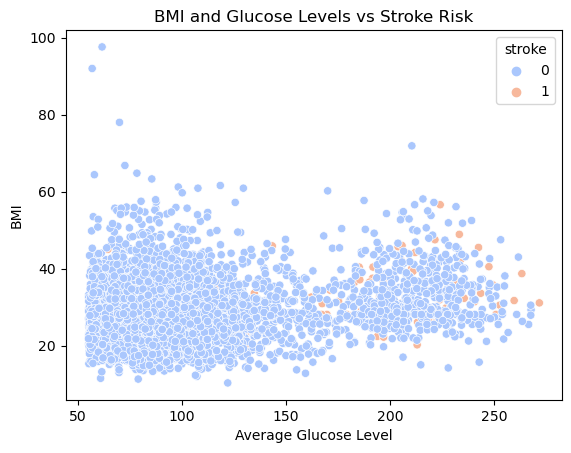

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze the relationship between age, glucose levels, BMI, and stroke risk
# Age vs Stroke
stroke_by_age = data.groupby('age')['stroke'].mean()

# Glucose levels and BMI as predictors for stroke risk
sns.scatterplot(x='avg_glucose_level', y='bmi', hue='stroke', data=data, palette="coolwarm")
plt.title("BMI and Glucose Levels vs Stroke Risk")
plt.xlabel("Average Glucose Level")
plt.ylabel("BMI")
plt.show()




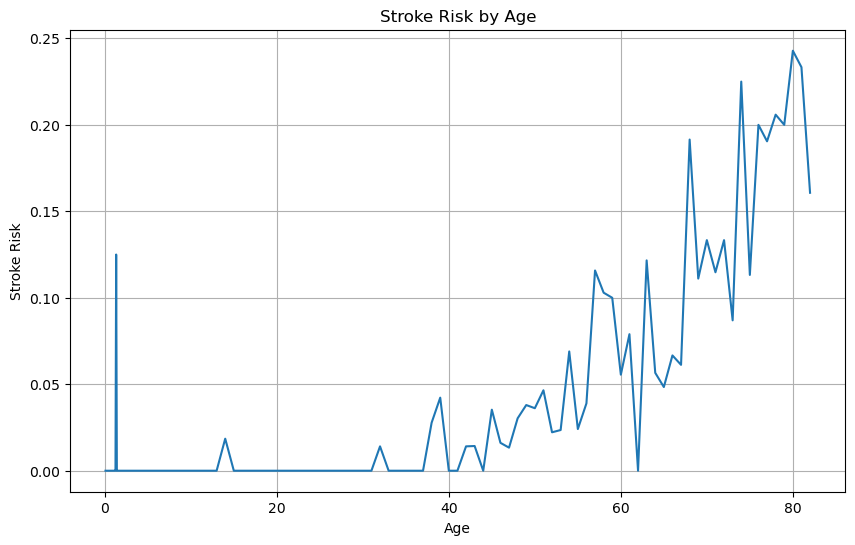

(80.0, 0.24285714285714285)

In [41]:
# Aggregating stroke risk by age
stroke_by_age.plot(kind='line', figsize=(10, 6))
plt.title("Stroke Risk by Age")
plt.xlabel("Age")
plt.ylabel("Stroke Risk")
plt.grid(True)
plt.show()

# Displaying insights from the plots
stroke_by_age.idxmax(),stroke_by_age.max()